# Error Analysis

This notebook does not use FiftyOne; instead, it carries out some basic error analysis using the **Digits Dataset**.

Contents:

- General guideline
- Dataset is loaded and split
- A logistic regressoion model is trained
- Error Analysis:
  - Metrics: accuracy, precision, recall, F1
  - Confusion matrix plot
  - Log loss: model and baseline
  - Prediction probability distributions: confidence value histograms for TP, TN, FP, FN

## General Guideline

Performing a thorough error analysis on a classifier's performance involves both quantitative and visual techniques. Here's a comprehensive guide:

1. **Quantitative Analysis**:

    a. **Performance Metrics**: Start with basic metrics to get an overall sense of how well the model is performing.
      - **Accuracy**: Overall performance of the model.
      - **Precision, Recall, and F1-Score**: These metrics will give insight into the model's performance across individual classes.
      - **Confusion Matrix**: Helps in understanding the misclassifications.

    b. **Per-Class Performance**: It's important to see how the model performs on each individual class.
      - For multi-class problems, the "One vs Rest" approach can be used to compute per-class precision, recall, etc.

    c. **Log-Loss**: It's especially relevant since you have predicted probabilities from your classifier. Log-loss gives a sense of the quality of the probabilities predicted.

2. **Visual Analysis**:

    a. **Confusion Matrix Visualization**: Visual representation can make it easier to identify which classes are often confused.

    b. **ROC Curves and AUC**: For binary classification tasks, a ROC curve is quite standard. For multi-class, you can plot one curve per class treating it as one-vs-all.

    c. **Prediction Probability Distributions**: Plotting a histogram of predicted probabilities can be very telling. It might show, for example, that most incorrect predictions are less confident, which can be useful information.

    d. **Error Inspection with FiftyOne**:
      - Use FiftyOne to filter samples where `ground_truth != predictions` to manually inspect misclassifications.
      - Embed the data in 2D/3D using PCA/t-SNE/UMAP and use FiftyOne to visualize where errors are happening in the reduced feature space.

3. **Feature Importance**:

    a. Given that you're using Logistic Regression, you can inspect the coefficients of the model to see which features were most influential in predictions.

    b. You can also use tools like `SHAP` or `LIME` to interpret the model's predictions.

4. **Cross-Validation**:

    a. To ensure that the results are consistent across different samples of the data, use k-fold cross-validation and look at the variance and mean of the performance metrics.

5. **Residual Analysis**:
   
    a. Plot the residuals (difference between actual and predicted). This isn't common for classification tasks but can sometimes provide insights, especially if the residuals have a pattern.

6. **Comparison with a Baseline**:

    a. Always compare your model's performance with a baseline, like a random classifier or a simple heuristic, to ensure that your model is indeed adding value.

7. **Error Clustering**:
   
    a. Cluster your errors to see if there's a pattern. This may help in identifying systemic issues with the model.

8. **Class Imbalance**:

    a. Check if your classes are imbalanced, as it can cause a model to be biased towards the majority class. If so, consider techniques like oversampling, undersampling, or using different evaluation metrics.

9. **Check for Data Issues**:

    a. It's always a good idea to go back and inspect the data. Sometimes errors can be attributed to incorrect labels, outliers, or other data quality issues.

## Example: Digits Dataset

In [37]:
# Load dataset
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

#iris = datasets.load_iris()
#X = iris.data
#y = iris.target
#class_names = iris.target_names
#wine = datasets.load_wine()
#X = wine.data
#y = wine.target
#class_names = wine.target_names
digits = datasets.load_digits()
X = digits.data
y = digits.target
class_names = digits.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Print class names and feature vector shape
print(class_names)
print(X.shape)

[0 1 2 3 4 5 6 7 8 9]
(1797, 64)


In [62]:
# Train model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = LogisticRegression(max_iter=1) # few iterations, on purpose, to get worse results
clf.fit(X_train, y_train)

c:\Users\Msagardi\AppData\Local\anaconda3\envs\label\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1)

In [63]:
# Make the predictions
y_pred = clf.predict(X_test)
y_probs = clf.predict_proba(X_test)

### Error Analysis

#### Metrics: Accuracy, Precision, Recall, F1

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Precision, Recall, and F1 Score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.6796296296296296
Precision: 0.7776319566701595
Recall: 0.6796296296296296
F1 Score: 0.6311618126825946


#### Confusion Matrix Plot

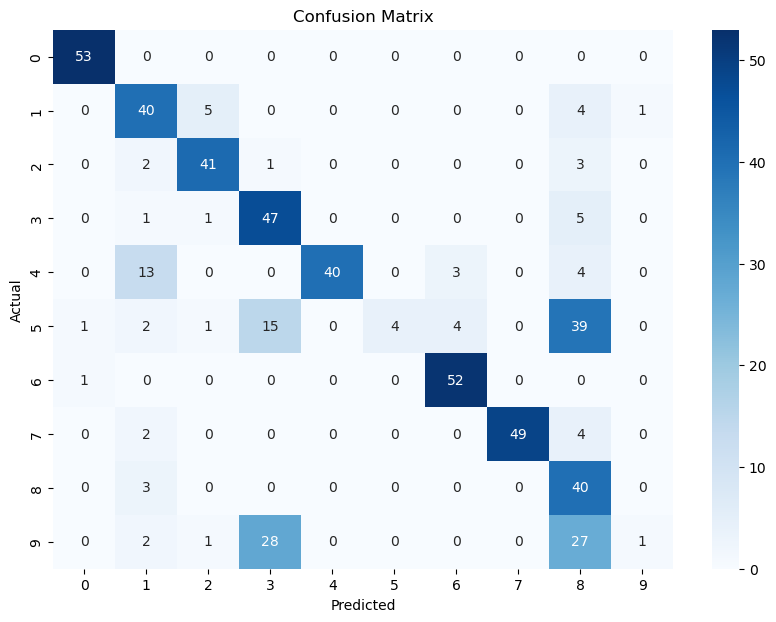

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Log-Loss

In [77]:
from sklearn.metrics import log_loss

# Calculate log loss
logloss = log_loss(y_test, y_probs)
print(f'Log Loss: {logloss}')
print(f'Baseline Log Loss (random guess): {-np.log(1.0/len(class_names))}')

# Log loss = logistic loss = cross-entropy loss
# Input is a probability value between 0 and 1
# 0.00-0.10: Excellent model
# 0.10-0.20: Good model
# 0.20-0.30: Fair model
# 0.30-0.50: Poor model; may be acceptable depending on the application
# > 0.50: The model may have issues in terms of performance or may be predicting probabilities poorly
#
# Binary classification with balanced dataset:
# Random guessing -> log_loss = -log(1/2) = log(2) = 0.69
#
# Binary classification with IMbalanced dataset (p != 0.5, p: probability of the positive class)
# Random guessing -> log_loss = −(p*log(p) + (1−p)*log(1−p))
#
# Multiclass classification with balanced dataset:
# Random guessing -> log_loss = -log(1/C) = log(C)


Log Loss: 1.0296323188048357
Baseline Log Loss (random guess): 2.3025850929940455


#### Prediction Probability Distributions

TP mean p =  0.5417620344179179
TN mean p =  0.0002138279566007625
FN mean p =  0.07538909288862665


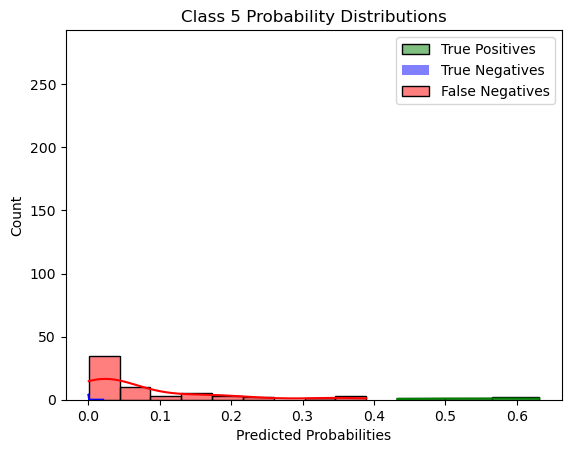

In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_probability_distributions(class_index, y_test, y_probs, y_pred):
    # Create masks for the four conditions
    tp_mask = (y_test == class_index) & (y_pred == class_index)
    tn_mask = (y_test != class_index) & (y_pred != class_index)
    fp_mask = (y_test != class_index) & (y_pred == class_index)
    fn_mask = (y_test == class_index) & (y_pred != class_index)

    # Initialize variables to avoid reference before assignment
    tp_probs, tn_probs, fp_probs, fn_probs = [], [], [], []

    # Check if there are any probabilities to be plotted for each condition
    if np.any(tp_mask):
        tp_probs = y_probs[tp_mask, class_index]
        print("TP mean p = ", np.mean(tp_probs))
    if np.any(tn_mask):
        tn_probs = y_probs[tn_mask, class_index]
        print("TN mean p = ", np.mean(tn_probs))
    if np.any(fp_mask):
        fp_probs = y_probs[fp_mask, class_index]
        print("FP mean p = ", np.mean(fp_probs))
    if np.any(fn_mask):
        fn_probs = y_probs[fn_mask, class_index]
        print("FN mean p = ", np.mean(fn_probs))

    # Plot distributions
    if len(tp_probs) > 0:
        sns.histplot(tp_probs, color='green', label='True Positives', kde=True)
    if len(tn_probs) > 0:
        sns.histplot(tn_probs, color='blue', label='True Negatives', kde=True)
    if len(fp_probs) > 0:
        sns.histplot(fp_probs, color='orange', label='False Positives', kde=True)
    if len(fn_probs) > 0:
        sns.histplot(fn_probs, color='red', label='False Negatives', kde=True)

    plt.legend()
    plt.xlabel('Predicted Probabilities')
    plt.title(f'Class {class_names[class_index]} Probability Distributions')
    plt.show()

# Example usage for class 0
plot_probability_distributions(5, y_test, y_probs, y_pred)